A total of 8 tables were captured.


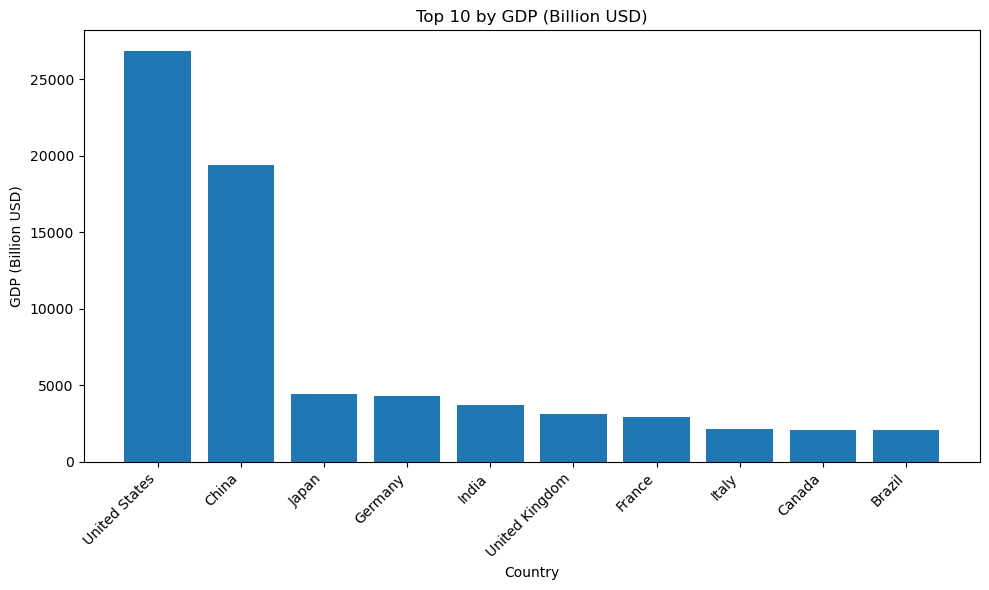

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Display the image in the notebook.
%matplotlib inline

# Set the URL for Wikipedia
URL = "https://web.archive.org/web/20230902185326/https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28nominal%29"  

# Read all HTML tables in a webpage
tables = pd.read_html(URL)

# Take a look at how many tables we've climbed to.
print(f"A total of {len(tables)} tables were captured.")

df = tables[3]
# Make a copy first to avoid directly modifying the original df
df_clean=df.copy()
df_clean.columns=range(df_clean.shape[1])

# Only the country names in column zero and the estimated figures from the International Monetary Fund in column two are retained.
df_clean=df_clean[[0,2]]

# Extract all columns from row 1 to row 10.
df_clean=df_clean.iloc[1:11,:]
df_clean.columns=['Country','GDP (Million USD)']

# Convert a string containing commas to a floating-point number.
df_clean['GDP (Million USD)'] = (
    df_clean['GDP (Million USD)']
    .astype(str)
    .str.replace(",","",regex=False)
    .astype(float)
)

# Convert GDP values in millions of dollars to billions of dollars
df_clean[['GDP (Million USD)']]=df_clean[['GDP (Million USD)']]/1000
df_clean[['GDP (Million USD)']]=np.round(df_clean[['GDP (Million USD)']],2)

# Rename the column in the DataFrame that was named "GDP (Million USD)" to "GDP (Billion USD)".
df_clean.rename(columns={'GDP (Million USD)':'GDP (Billion USD)'},inplace=True)

#./ → current directory
#The DataFrame is exported as a CSV file named Largest_economies.csv and saved in the current working directory.。
df_clean.to_csv('./Largest_economies.csv')

# Set chart size；width 10 inches，length 6 inches
plt.figure(figsize=(10,6))

# Draw a bar chart
plt.bar(df_clean['Country'],df_clean['GDP (Billion USD)'])

# Rotate the x-axis tick marks by 45° and set the horizontal alignment to "Right".
plt.xticks(rotation=45,ha="right")

# Set axis names and titles
plt.xlabel("Country")
plt.ylabel("GDP (Billion USD)")
plt.title("Top 10 by GDP (Billion USD)")

#Automatically adjust chart layout
plt.tight_layout()

#Show chart
plt.savefig("gdp_chart.png", dpi=300, bbox_inches='tight')
plt.show()
